In [1]:
#from load_cifar import cifarset,load_data
from Mosaic import mosaic_data,MosaicDataset,split_foreground_background
from Models import Classification_Module as Classification_Module
from Models import Focus_Module as Focus_Module
from plots import plot_analysis
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from train_mosaic import train_mosaic_network
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader

%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda
cuda


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
data = split_foreground_background(trainloader,total = 50000)
mosaic_list_of_images,mosaic_label,fore_idx = mosaic_data(data,desired_num=30000,total=50000)

batch = 125
train_dataset  = MosaicDataset(mosaic_list_of_images, mosaic_label , fore_idx)
mosaic_loader = DataLoader( train_dataset,batch_size= batch ,shuffle=True)

mimages_val,mlabel_val,fidx_val = mosaic_data(data,desired_num=10000,total=50000)

In [4]:
batch = 125
test_dataset  = MosaicDataset(mimages_val,mlabel_val,fidx_val)
test_loader = DataLoader( test_dataset,batch_size= batch ,shuffle=True)

In [5]:
focus_net =  Focus_Module(3,1).double()
focus_net = focus_net.to(device)

In [6]:
classification_net  = Classification_Module(3,3).double()
classification_net = classification_net.to(device)

In [7]:
train_network = train_mosaic_network(focus_net,classification_net,mosaic_loader,test_loader)

In [8]:
train_network.training(120)

Training started...
[1,    80] loss: 1.104
[1,   160] loss: 1.099
[1,   240] loss: 1.099
[2,    80] loss: 1.099
[2,   160] loss: 1.099
[2,   240] loss: 1.099
[3,    80] loss: 1.098
[3,   160] loss: 1.098
[3,   240] loss: 1.098
[4,    80] loss: 1.098
[4,   160] loss: 1.097
[4,   240] loss: 1.097
[5,    80] loss: 1.094
[5,   160] loss: 1.092
[5,   240] loss: 1.089
[6,    80] loss: 1.086
[6,   160] loss: 1.083
[6,   240] loss: 1.079
[7,    80] loss: 1.077
[7,   160] loss: 1.077
[7,   240] loss: 1.073
[8,    80] loss: 1.072
[8,   160] loss: 1.069
[8,   240] loss: 1.065
[9,    80] loss: 1.067
[9,   160] loss: 1.059
[9,   240] loss: 1.057
[10,    80] loss: 1.058
[10,   160] loss: 1.053
[10,   240] loss: 1.055
[11,    80] loss: 1.054
[11,   160] loss: 1.050
[11,   240] loss: 1.052
[12,    80] loss: 1.050
[12,   160] loss: 1.047
[12,   240] loss: 1.050
[13,    80] loss: 1.046
[13,   160] loss: 1.045
[13,   240] loss: 1.052
[14,    80] loss: 1.046
[14,   160] loss: 1.041
[14,   240] loss: 1.041

In [9]:
_ = train_network.predict(mosaic_loader,True)

percentage train accuracy:  0.9926666666666667


In [10]:
_ = train_network.predict(test_loader,True)

percentage train accuracy:  0.8737


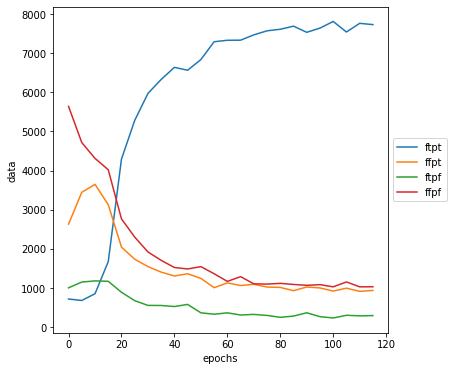

In [23]:
plot_analysis(np.array(train_network.train_analysis))

In [19]:
plot_analysis(np.array(train_network.test_analysis))

In [21]:
from matplotlib import pyplot as plt